In [14]:
data =[[0,913.2,911.1,913.9,910.5,913.5,910.8,909.9,910.5,909.3,910.9,909.6],
[0,896.8,897.3,898.1,895.3,899.8,895.5,894.5,895.6,898.1,894.7,897],
[0,696.3,699,697.7,698.1,696.6,697.5,697.3,697.8,698.5,698.1,696.8],
[0,673,672.3,672.9,672.5,673.9,672.1,673.9,671.9,673.5,672.3,674.3],
[0,601.6,604.7,603.4,602,602.4,601.7,601.8,601.5,602.5,605,602.2],
[0,377.3,377,377,377,375.4,375.3,377,377,377,376.9,377]]


import pandas as pd
dat = pd.DataFrame(data, index=['yeast', 'human','cora','citeseer','pubmed','wordnet'], columns=[0,1,2,4,6,8,10,12,14,16,18,20]).T


In [16]:
dat

,yeast,human,cora,citeseer,pubmed,wordnet
0,0.0,0.0,0.0,0.0,0.0,0.0
1,913.2,896.8,696.3,673.0,601.6,377.3
2,911.1,897.3,699.0,672.3,604.7,377.0
4,913.9,898.1,697.7,672.9,603.4,377.0
6,910.5,895.3,698.1,672.5,602.0,377.0
8,913.5,899.8,696.6,673.9,602.4,375.4
10,910.8,895.5,697.5,672.1,601.7,375.3
12,909.9,894.5,697.3,673.9,601.8,377.0
14,910.5,895.6,697.8,671.9,601.5,377.0
16,909.3,898.1,698.5,673.5,602.5,377.0


In [17]:
dat.iloc[[0,1]]

,yeast,human,cora,citeseer,pubmed,wordnet
0,0.0,0.0,0.0,0.0,0.0,0.0
1,913.2,896.8,696.3,673.0,601.6,377.3


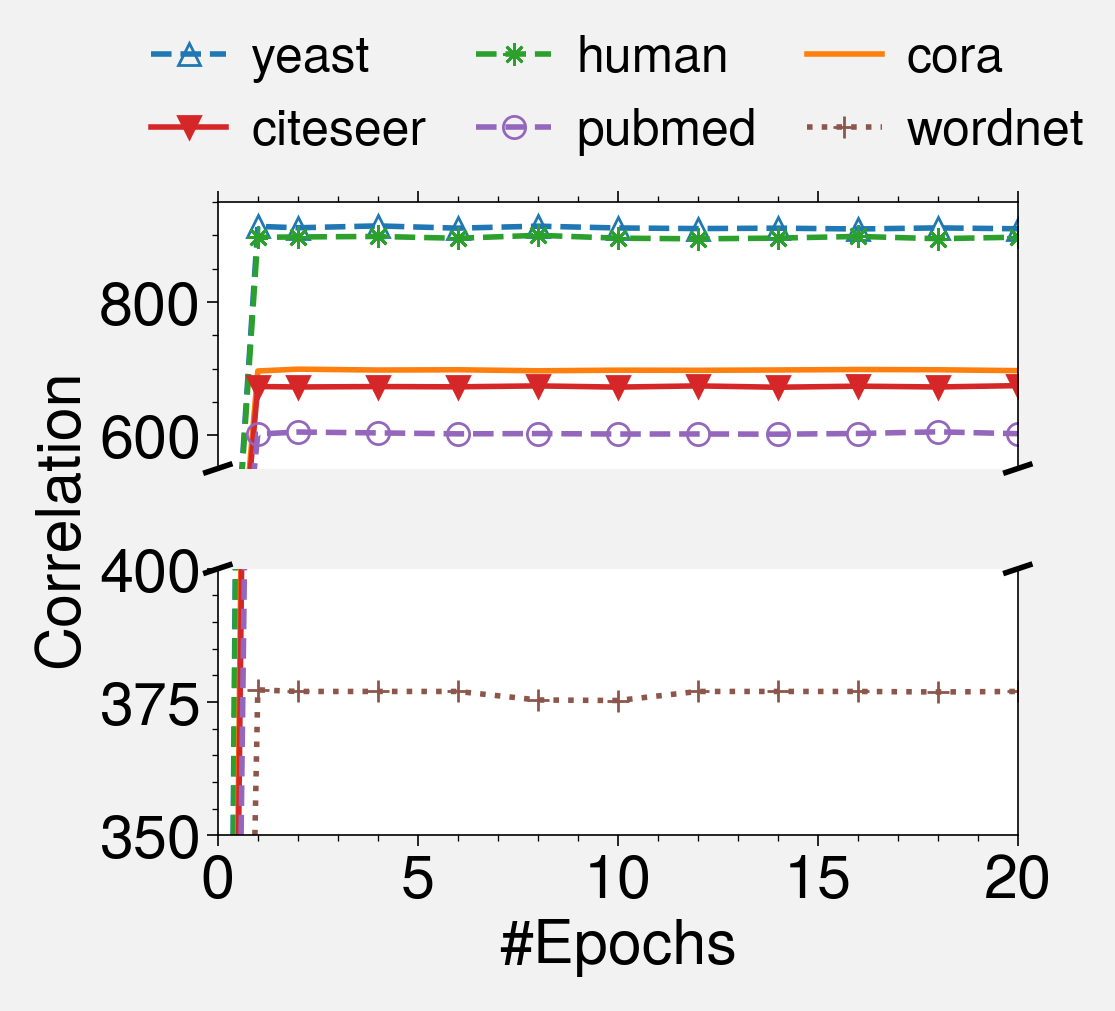

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=22
plot.rc.large=24

f, axs = plot.subplots(
    nrows=2, ncols=1, aspect=3, axwidth=4,
    share=1, wratios=(1)
)
axs.format(
    xlim=(0,20), ylim=(-1,-0.55), xgrid=False, ygrid=False, ylabel='Correlation',xlabel='#Epochs'
)

ax = axs[0]
ax2 = axs[1]

ax.set_ylim(550, 950)  # outliers only
ax2.set_ylim(350, 400)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
# cycle = plot.Cycle(['b','g','k','r','m','k'], marker=["^",(8,2,0),"","v","o","+"], 
#                    markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
#                    linewidth=[2,2,2,2,2,2], 
#                    fillstyle=['none','full','full','full','none','full'])

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

ax = axs[0]
obj = ax.plot(dat, cycle=cycle, legend='t', labels=columns, legend_kw={'frameon':False, 'ncols':3 ,'fontsize':'18'})
# obj = ax.plot(dat.iloc[[1,4,7,10,13,16,19]], cycle=cycle)
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='r')

ax2.plot(dat, cycle=cycle)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# f.legend(obj, columns)
plt.savefig("epoch_corr.eps")
plt.show()

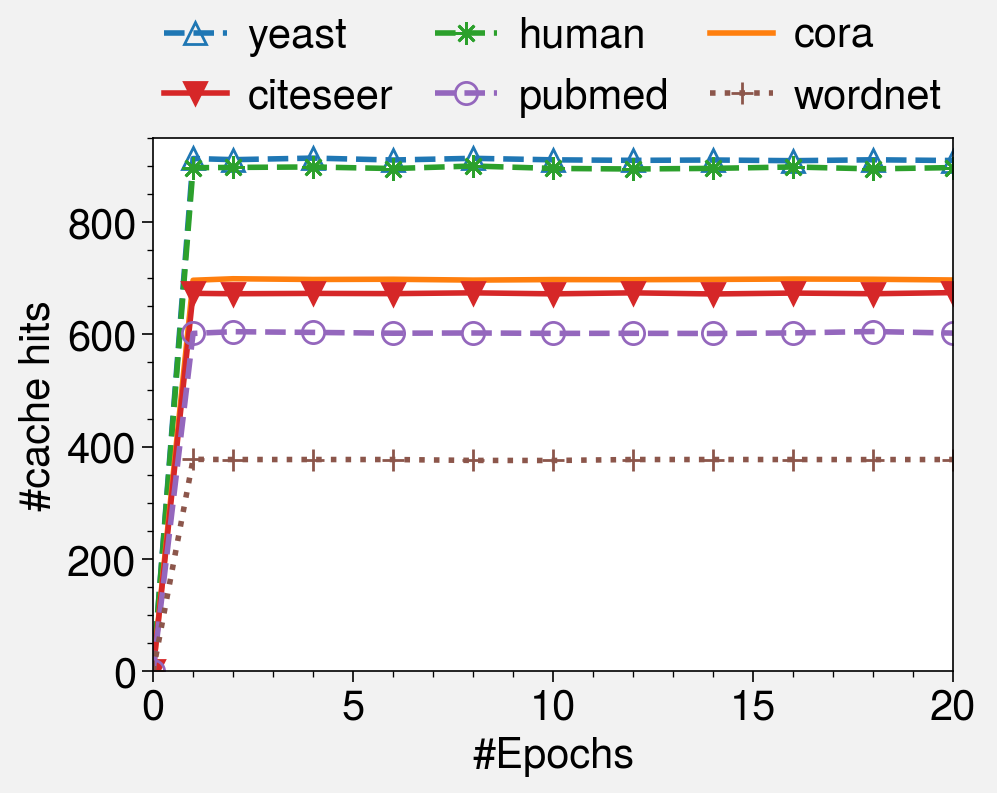

In [22]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=15
plot.rc.large=24

f, axs = plot.subplots(
    nrows=1, ncols=1, aspect=1.5, axwidth=4,
    share=1, wratios=(1)
)
axs.format(
    xlim=(0,20), ylim=(0,950), xgrid=False, ygrid=False, ylabel='#cache hits',xlabel='#Epochs'
)

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

ax = axs[0]
obj = ax.plot(dat, cycle=cycle,legend='t', labels=columns, legend_kw={'frameon':False, 'ncols':3})
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='ul')


# f.legend(obj, columns)
plt.savefig("epoch_hits.eps")
plt.show()

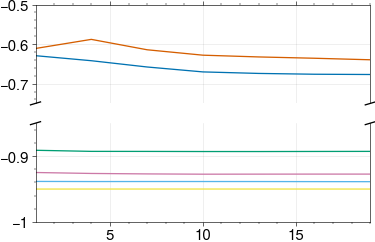

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(dat.iloc[[1,4,7,10,13,16,19]])
ax2.plot(dat.iloc[[1,4,7,10,13,16,19]])

# zoom-in / limit the view to different portions of the data
ax.set_ylim(-.75, -.5)  # outliers only
ax2.set_ylim(-1, -0.85)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [7]:
import pandas as pd
data = [0.21,0.357,5.26,0.165,0.202,1.264]

dat1 = pd.DataFrame(data,index=['yeast', 'human',  'word.', 'cora', 'cite.', 'pubmed'])

C:\Users\vic4ever\Anaconda3\lib\site-packages\proplot\wrappers.py:2442: UserWarning: The handle <BarContainer object of 6 artists> has a label of '_container0' which cannot be automatically added to the legend.
  leg = mlegend.Legend(self, *zip(*pairs), ncol=ncol, loc=loc, **kwargs)


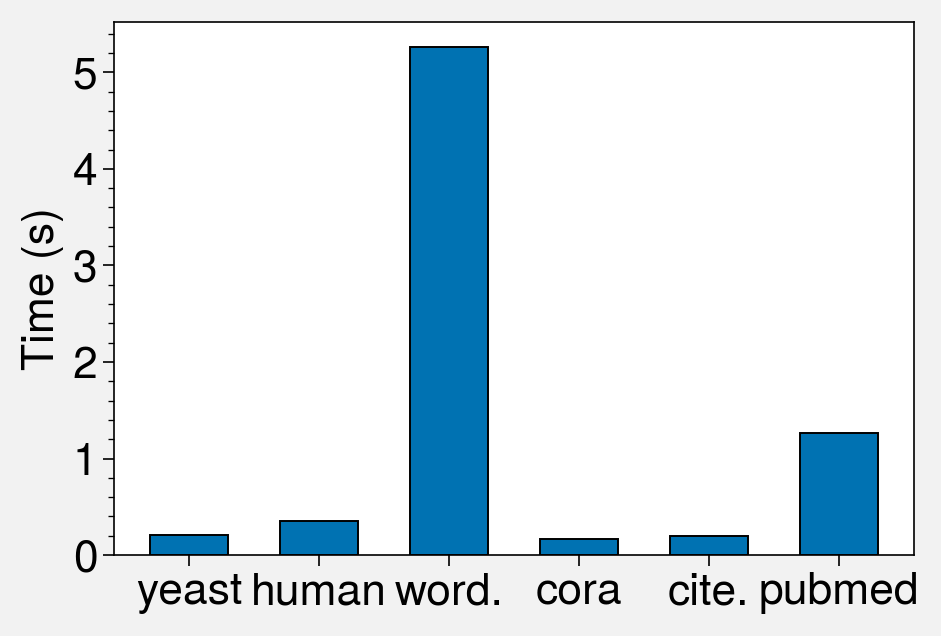

In [10]:
import matplotlib.pyplot as plt

import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=16
plot.rc.large=24


f, axs = plot.subplots(
    nrows=1, ncols=1, aspect=1.5, axwidth=4,
    share=0, wratios=(1)
)

cycle = 'qual1'
columns=["with emb.", "w/o emb."]


# Asking add_errorbars to calculate bars
ax1 = axs[0]
obj = ax1.bar(dat1, legend='ul', legend_kw={'frame':False, 'ncols':1},  width=0.6)
ax1.format(ylabel='Time (s)', ygrid=False, xgrid=False, ylocator=1)


# # f.legend(obj, columns)
plt.savefig("epochtime.eps")